#Daily Return (Daily Percentage)

The daily return measures the stock change as a percentage of the previous day’s closing price. A positive return means the stock has grown in value, while a negative return means it has lost value.

Daily percentage change is defined by the following formula:


**DailyReturn = TodayPrice / YesterdayReturn - 1** 

or

**r(t) = p(t)/p(t-1) -1**


This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('RELIANCE.NS.csv')


In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2018,922.700012,922.700012,907.500000,909.750000,904.174133,4321686
1,02-01-2018,913.000000,919.549988,906.400024,911.150024,905.565552,4342815
2,03-01-2018,925.000000,926.000000,913.049988,914.799988,909.193176,6175312
3,04-01-2018,918.150024,921.799988,915.700012,920.299988,914.659424,4118581
4,05-01-2018,921.799988,926.900024,920.250000,923.250000,917.591370,3401905


In [4]:
data['Daily_return']=data['Close']/data['Close'].shift(1)-1
#or we can use pct_change()
data['Daily_return_pct'] = data['Close'].pct_change(1)

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_return,Daily_return_pct
0,01-01-2018,922.700012,922.700012,907.500000,909.750000,904.174133,4321686,NaN,NaN
1,02-01-2018,913.000000,919.549988,906.400024,911.150024,905.565552,4342815,0.001539,0.001539
2,03-01-2018,925.000000,926.000000,913.049988,914.799988,909.193176,6175312,0.004006,0.004006
3,04-01-2018,918.150024,921.799988,915.700012,920.299988,914.659424,4118581,0.006012,0.006012
4,05-01-2018,921.799988,926.900024,920.250000,923.250000,917.591370,3401905,0.003205,0.003205


#Cumulative Daily return

Cumulative return is the entire amount of money an investment has earned for an investor, irrespective of time. Annualized return is the amount of money the investment has earned for the investor in one year.This is different than just the stock price at the current day, because it will take into account the daily returns.



In [6]:
data['Cumulative_return'] = np.cumsum(data['Daily_return'])

In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_return,Daily_return_pct,Cumulative_return
0,01-01-2018,922.700012,922.700012,907.500000,909.750000,904.174133,4321686,NaN,NaN,NaN
1,02-01-2018,913.000000,919.549988,906.400024,911.150024,905.565552,4342815,0.001539,0.001539,0.001539
2,03-01-2018,925.000000,926.000000,913.049988,914.799988,909.193176,6175312,0.004006,0.004006,0.005545
3,04-01-2018,918.150024,921.799988,915.700012,920.299988,914.659424,4118581,0.006012,0.006012,0.011557
4,05-01-2018,921.799988,926.900024,920.250000,923.250000,917.591370,3401905,0.003205,0.003205,0.014763
5,08-01-2018,926.099976,931.000000,923.500000,928.549988,922.858887,4035417,0.005741,0.005741,0.020503
6,09-01-2018,928.150024,943.900024,924.000000,940.950012,935.182922,6534997,0.013354,0.013354,0.033857
7,10-01-2018,943.000000,947.400024,935.500000,942.349976,936.574280,5361502,0.001488,0.001488,0.035345
8,11-01-2018,941.799988,942.650024,935.000000,937.750000,932.002502,3588377,-0.004881,-0.004881,0.030464
9,12-01-2018,943.000000,952.799988,938.250000,949.000000,943.183533,6890028,0.011997,0.011997,0.042461


#Log return

Log returns are time additive. Most technical analyses require detrending/normalizing the time series. Log return is a nice way to do it.

#Cumulative Return (Compound factor)

The compound return is the rate of return, usually expressed as a percentage, that represents the cumulative effect that a series of gains or losses has on an original amount of capital over a period of time

if I invested $1 in the company at the beginning of the time series, how much would is be worth today?

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()

In [8]:
data['Cumulative_return_Comp'] = (1 + data['Daily_return']).cumprod()

In [9]:
data 

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_return,Daily_return_pct,Cumulative_return,Cumulative_return_Comp
0,01-01-2018,922.700012,922.700012,907.500000,909.750000,904.174133,4321686,NaN,NaN,NaN,NaN
1,02-01-2018,913.000000,919.549988,906.400024,911.150024,905.565552,4342815,0.001539,0.001539,0.001539,1.001539
2,03-01-2018,925.000000,926.000000,913.049988,914.799988,909.193176,6175312,0.004006,0.004006,0.005545,1.005551
3,04-01-2018,918.150024,921.799988,915.700012,920.299988,914.659424,4118581,0.006012,0.006012,0.011557,1.011597
4,05-01-2018,921.799988,926.900024,920.250000,923.250000,917.591370,3401905,0.003205,0.003205,0.014763,1.014839
5,08-01-2018,926.099976,931.000000,923.500000,928.549988,922.858887,4035417,0.005741,0.005741,0.020503,1.020665
6,09-01-2018,928.150024,943.900024,924.000000,940.950012,935.182922,6534997,0.013354,0.013354,0.033857,1.034295
7,10-01-2018,943.000000,947.400024,935.500000,942.349976,936.574280,5361502,0.001488,0.001488,0.035345,1.035834
8,11-01-2018,941.799988,942.650024,935.000000,937.750000,932.002502,3588377,-0.004881,-0.004881,0.030464,1.030778
9,12-01-2018,943.000000,952.799988,938.250000,949.000000,943.183533,6890028,0.011997,0.011997,0.042461,1.043144


#Plot log return histogram in 5 weeks (5 bins)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([7., 3., 5., 4., 2.]),
 array([1.00153891, 1.01738941, 1.03323992, 1.04909042, 1.06494092,
        1.08079143]),
 <a list of 5 Patch objects>)

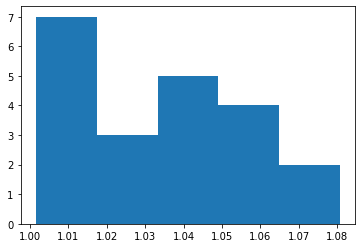

In [10]:
plt.hist(data['Cumulative_return_Comp'], bins=5)  

#Log Return Properties

Dividing all by P0 and applying a special logarithm called the natural logarithm (ln) which uses the Euler number e as its base, it gives us:

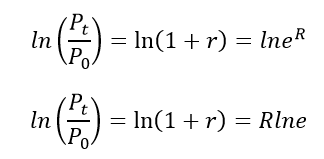


The logarithm of a number that is equal to its base gives you a value of 1. So,

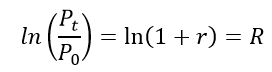

ln(1+r) is what we called the log returns. It is the same as R which is the continuously compounded rate of return that will grow the price of the stock from P0 to Pt.


 




#*Log returns can be added across time periods


adding simple returns, on the other hand, can lead to misleading outcomes.

 For example:

Let’s say you have a stock worth `$100` that rose to `$120` in the first time period and then goes back to` $100` in the second time period. 

Going by simple returns, you will get a 20% increase in the first time period and -16.7% decrease in the second time period. 

If you just add them up or even take an average, you will get a total return of 3.3% and an average return of 1.7% even though you did not make any money at all.

Log returns, however, being the continuously compounded return, can be added across time.

Adding up the log returns over the period gives you a total and average return of 0% in this example.





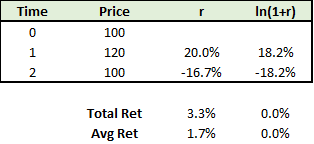


a little mathematical rigour:

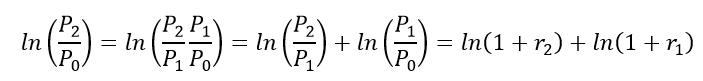


#*Log returns can be easily converted back into simple returns.

 To get simple returns out from the log returns, you can easily do it by applying the exponential function.

 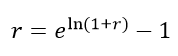